In [1]:
from spiketimes.df import waveform_width_by_neuron, peak_asymmetry_by_neuron, mean_firing_rate_ifr_by_neuron
from spiketimes.plots import plot_waveform_peaks
from pyarrow.feather import read_feather
from pathlib import Path
import pandas as pd
from ephys_queries import select_ifr, db_setup_core
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [2]:
data_dir = Path(".").absolute().parent / "data" 
df_peaks = read_feather(data_dir / "waveform_peaks.feather")
df_waves = read_feather(data_dir / "waveforms.feather")

In [3]:
load_dotenv()
engine, metadata = db_setup_core()
df_ifr = select_ifr(engine, metadata, exp_names=["OPTO"], block_name="pre")

In [4]:
df_mfr = mean_firing_rate_ifr_by_neuron(df_ifr)

In [5]:
r1 = waveform_width_by_neuron(df_peaks.dropna())
r2 = peak_asymmetry_by_neuron(df_peaks)

In [6]:
df = pd.merge(r1, r2)
df = pd.merge(df, df_mfr)
df = pd.merge(df, df_ifr[["neuron_id", "group_name"]].drop_duplicates())

In [7]:
save_dir = data_dir = Path(".").absolute().parent / "figs" 

In [8]:
plt.style.use("seaborn-ticks")
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

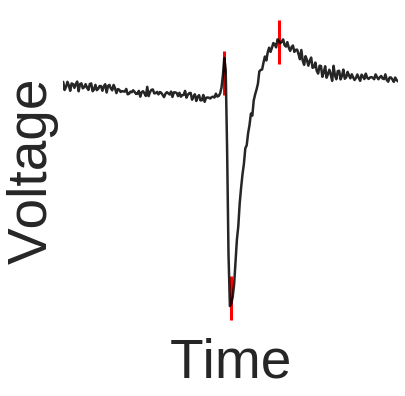

In [10]:
neuron_ids = df_peaks.neuron_id.unique()
neuron = neuron_ids[103]


peaks_kwargs = {'marker': "|", "s": 2000, "linewidth": 3}

ax = plot_waveform_peaks(df_waves, df_peaks, neuron_id=neuron, peaks_plot_kwargs=peaks_kwargs)

ax.get_legend().remove()


ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([])
ax.set_ylabel("Voltage", fontsize=55)
ax.set_xlabel("Time", fontsize=55)
plt.savefig(save_dir / "waveform_1.png", dpi=300)

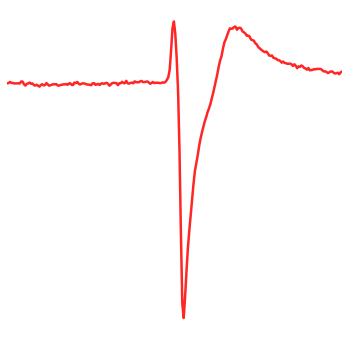

In [14]:
neuron_ids = df_peaks.neuron_id.unique()
neuron = neuron_ids[120]

peaks_kwargs = {"s": 0}
wave_kwargs = {"color": "red"}

ax = plot_waveform_peaks(df_waves, df_peaks, neuron_id=neuron, peaks_plot_kwargs=peaks_kwargs,
                        waveform_plot_kwargs=wave_kwargs)

ax.get_legend().remove()


ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([])
ax.set_ylabel("", fontsize=25)
ax.set_xlabel("", fontsize=25)
plt.savefig(save_dir / "waveform_2.png", dpi=300)

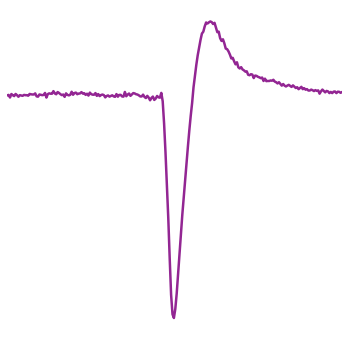

In [19]:
neuron_ids = df_peaks.neuron_id.unique()
neuron = neuron_ids[-103]

peaks_kwargs = {"s": 0}
wave_kwargs = {"color": "purple"}

ax = plot_waveform_peaks(df_waves, df_peaks, neuron_id=neuron, peaks_plot_kwargs=peaks_kwargs,
                        waveform_plot_kwargs=wave_kwargs)

ax.get_legend().remove()


ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([])
ax.set_ylabel("", fontsize=25)
ax.set_xlabel("", fontsize=25)
plt.savefig(save_dir / "waveform_3.png", dpi=300)

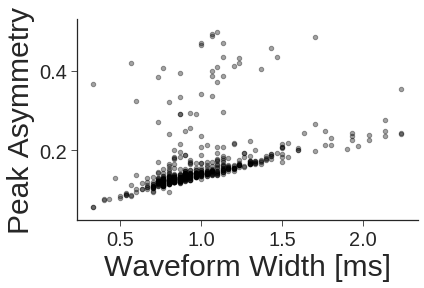

In [21]:
f, ax = plt.subplots()

ax = df.assign(waveform_width=df.waveform_width.divide(30)).plot(x="waveform_width", 
                                                            y="peak_asymmetry", 
                                                            kind="scatter", 
                                                            alpha=0.36,
                                                            color="black",
                                                            ax=ax)
ax.set_xlabel("Waveform Width [ms]", fontsize=30)
ax.set_ylabel("Peak Asymmetry", fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig(save_dir / "peak_asym_x_wavefrom_width.png", dpi=300)

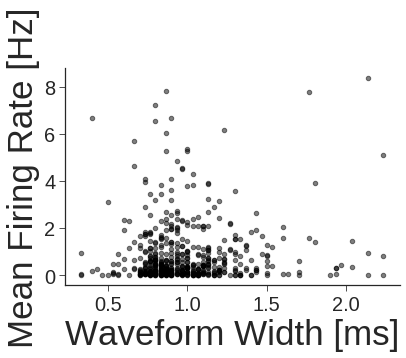

In [23]:
f, ax = plt.subplots()

ax = df.assign(waveform_width=df.waveform_width.divide(30)).plot(x="waveform_width", 
                                                            y="mean_firing_rate", 
                                                            kind="scatter", 
                                                            alpha=0.5, 
                                                            color="black", ax=ax)
ax.set_xlabel("Waveform Width [ms]", fontsize=35)
ax.set_ylabel("Mean Firing Rate [Hz]", fontsize=35)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(save_dir / "mfr_x_wavefrom_width.png", dpi=300)

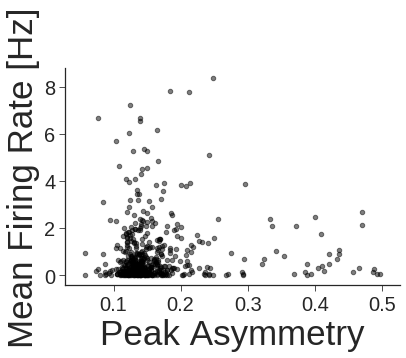

In [24]:
f, ax = plt.subplots()

ax = df.assign(waveform_width=df.waveform_width.divide(30)).plot(x="peak_asymmetry", 
                                                            y="mean_firing_rate", 
                                                            kind="scatter", 
                                                            alpha=0.5, 
                                                            color="black", ax=ax)
ax.set_xlabel("Peak Asymmetry", fontsize=35)
ax.set_ylabel("Mean Firing Rate [Hz]", fontsize=35)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(save_dir / "mfr_x_peak_asym.png")

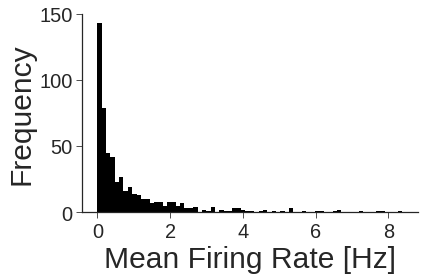

In [25]:
f, ax = plt.subplots()

ax = df["mean_firing_rate"].plot(kind="hist", color="black", bins=70)

ax.set_xlabel("Mean Firing Rate [Hz]", fontsize=30)
ax.set_ylabel("Frequency", fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig(save_dir / "mfr_hist.png", dpi=300)

In [27]:
df.groupby('group_name')["mean_firing_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
group_name,,,,,,,,
SERT-CHR2,245.0,0.880378,1.240762,0.0,0.099859,0.429295,1.161786,8.382309
SERT-VGLUT-KO-CHR2,301.0,0.888955,1.352881,0.0,0.106636,0.335569,0.923216,7.773799


In [38]:
df.drop_duplicates()

,neuron_id,waveform_width,peak_asymmetry,mean_firing_rate,group_name
0,273,22.0,0.118110,4.595097,SERT-CHR2
1,274,31.0,0.153846,1.526193,SERT-CHR2
2,275,29.0,0.148438,2.422224,SERT-CHR2
3,276,27.0,0.148438,0.782109,SERT-CHR2
4,277,64.0,0.275261,0.941681,SERT-CHR2
...,...,...,...,...,...
819,2370,30.0,0.136364,0.049974,SERT-CHR2
820,2371,32.0,0.142857,0.283579,SERT-CHR2
821,2372,31.0,0.139623,0.100966,SERT-CHR2
822,2373,39.0,0.186567,0.287933,SERT-CHR2


In [25]:
df.drop("neuron_id", axis=1).corr()

,waveform_width,peak_asymmetry,mean_firing_rate
waveform_width,1.000000,0.349085,0.025852
peak_asymmetry,0.349085,1.000000,0.015083
mean_firing_rate,0.025852,0.015083,1.000000


In [38]:
df_ifr.ifr.mean()

1.1216454015406978

In [42]:
df_ifr["neuron_id"].nunique()

825